In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.signal import savgol_filter


path = "datasets/LEAF_LEVEL_DATASET_Yufeng_Ge.xlsx"

# Read and load dataset
df= pd.read_excel(path, sheet_name="in")





INPUT DATA

In [3]:

X = (df.iloc[:,14:]).values
lambda_min = min(df.iloc[:,14:].columns)
lambda_max = max(df.iloc[:,14:].columns)
n_samples = X.shape[0]
print("Number of samples:", n_samples)


Number of samples: 2905


Apply a Savitzky-Golay filter

In [ ]:
lambdas = np.arange(lambda_min,lambda_max+1)
plt.figure(figsize=(9,5))
plt.suptitle("Savitzky-Golay filter")
plt.subplot(1,2,1)
plt.title("Before")
plt.plot(lambdas, X[0], color="g", label= "Before")
X = savgol_filter(X, window_length=128,polyorder=6)
plt.subplot(1,2,2)
plt.title("After")
plt.plot(lambdas, X[0], color="r", label= "After")
plt.show()


Spectral Binning 

In [ ]:
print(np.mean(X[:1,:4]))

In [ ]:
from scipy.stats import binned_statistic


bin_width = 4
num_bins = len(X[0])/bin_width

# Use binned_statistic to calculate mean within each bin
result = binned_statistic(X[0], X[0], bins=num_bins, statistic='mean')

print(result.statistic)

GAUSSIAN DISTRIBUTION

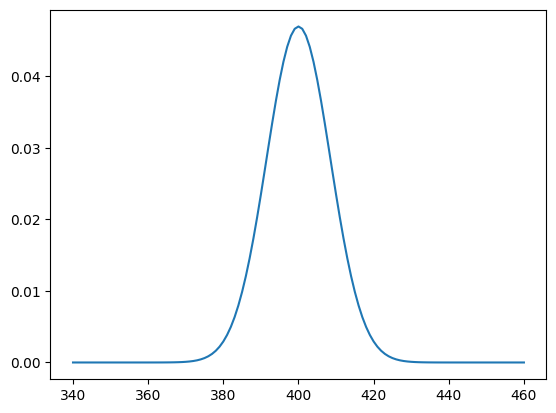

In [4]:


def gaussian(r,mu,sigma):
 return [(1/(sigma*np.sqrt(2*np.pi)))*np.exp((-1/2)*((x-mu)/sigma)**2) for x in r]


mu = 400
fwhm = 20
x = np.arange(mu-3*fwhm,mu+3*fwhm + 1, dtype=int)
y = gaussian(x,mu, fwhm/(2*np.sqrt(2*np.log(2))))
plt.plot(x,y)
plt.show()

Apply filter

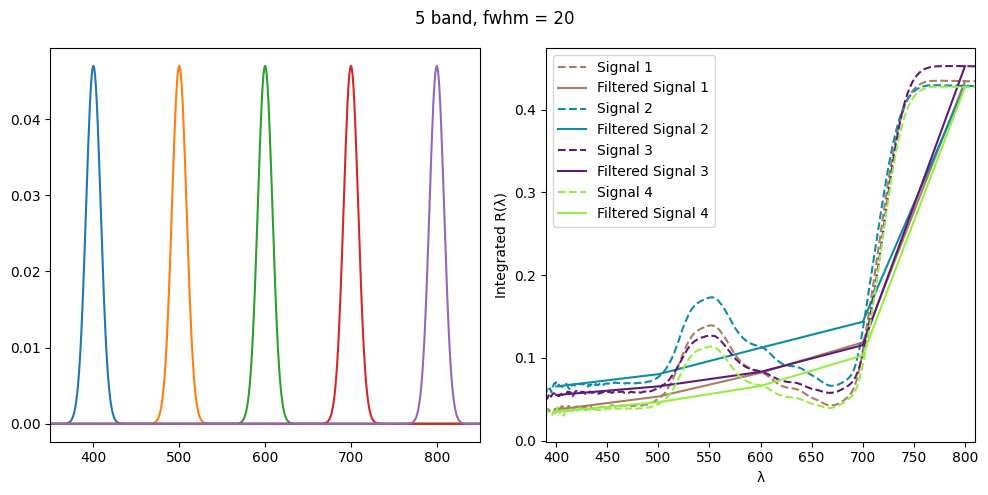

Filtered signals(n_bands=5, fwhm=20): [[0.03737553076690907, 0.053170483800949624, 0.0818864697079144, 0.11859589856252228, 0.43434955832720346], [0.06538663215650063, 0.08016897885119499, 0.11206234249890552, 0.14354103558075063, 0.42864898468527013], [0.05499720026024198, 0.06546522239126741, 0.08302705061877083, 0.1152918685742016, 0.4524316235115092], [0.035175610924306225, 0.04630254783938871, 0.06594143250001173, 0.10293466272492337, 0.42723759558278057]]


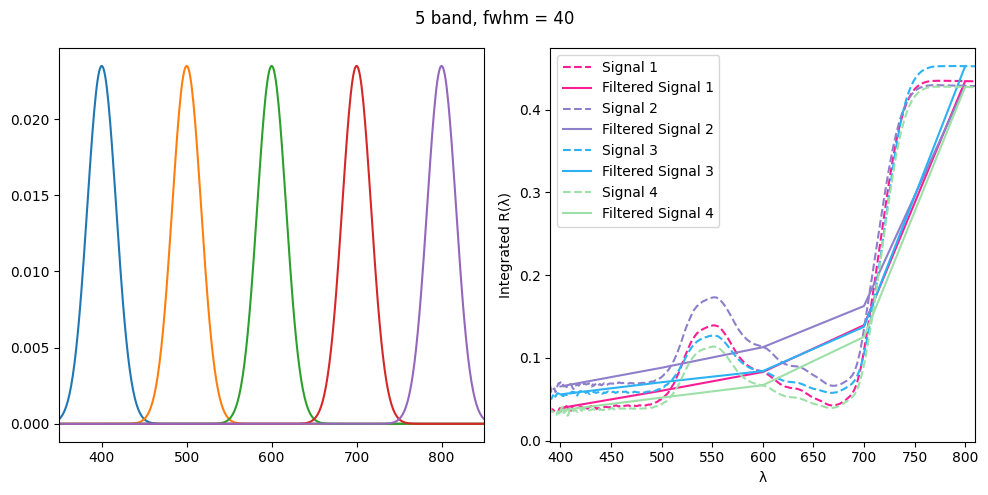

Filtered signals(n_bands=5, fwhm=40): [[0.03925486220502751, 0.06020235327520009, 0.08282868692800531, 0.13937904814695232, 0.43421620818417667], [0.06537358635812608, 0.08795921772623734, 0.1127657354179778, 0.16249881450351278, 0.42857202729673083], [0.05578837080618805, 0.07045222085403302, 0.08392088248593048, 0.13739649086840625, 0.45223549341451946], [0.0365565572242916, 0.05188023682125799, 0.06685561133486097, 0.12521283256027024, 0.4270771957148417]]


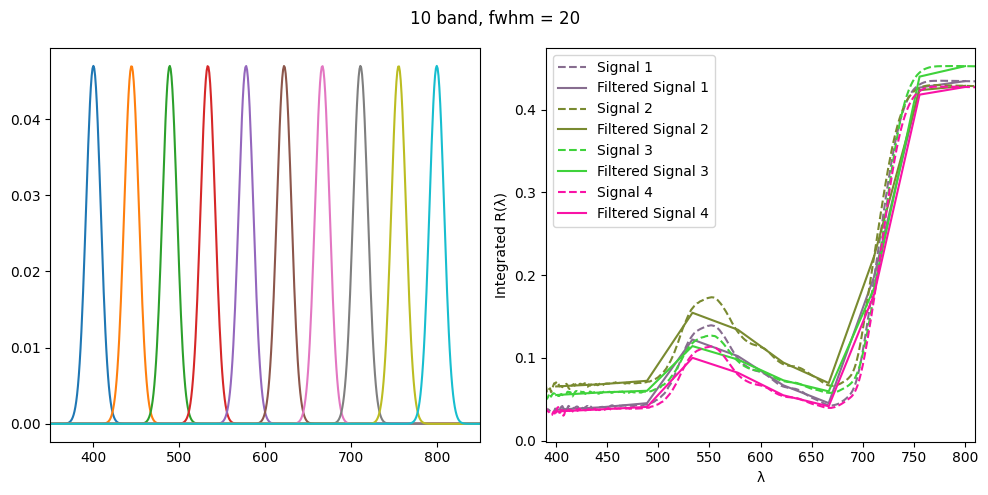

Filtered signals(n_bands=10, fwhm=20): [[0.03737553076690907, 0.040211931313743385, 0.04515285697884849, 0.12207113233258303, 0.10205248743749344, 0.06676925529581544, 0.045236274979827046, 0.198291477438039, 0.4265887201397519, 0.43434955832720346], [0.06538663215650063, 0.06810078349696691, 0.07220285265814515, 0.15444330344891113, 0.13391433470206332, 0.09425961071645787, 0.06947736143560536, 0.22283749479501436, 0.423408562789315, 0.42864898468527013], [0.05499720026024198, 0.05820027189713827, 0.06013694168657826, 0.11413693063468902, 0.09785872960629105, 0.07279302177559814, 0.059442429282313504, 0.18424938600778706, 0.4398121647791457, 0.4524316235115092], [0.035175610924306225, 0.03769972454542386, 0.04066451958519659, 0.09998256310887917, 0.08194359847699113, 0.05468432420096623, 0.04139796556521611, 0.17666129021238333, 0.41801086733054427, 0.42723759558278057]]


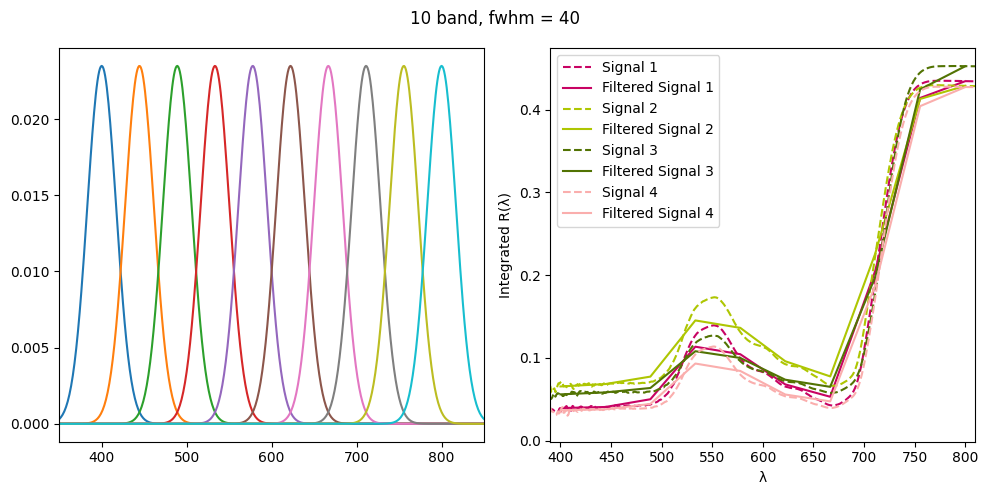

Filtered signals(n_bands=10, fwhm=40): [[0.03925486220502751, 0.04054915394816905, 0.04990672833383962, 0.11342070156535705, 0.10430067526423727, 0.0678440318454774, 0.05290302494776552, 0.2048864339311637, 0.4139780789541055, 0.43421620818417667], [0.06537358635812608, 0.06827169471304197, 0.07724686168985892, 0.14514831417746504, 0.13617810246080805, 0.09582516142622423, 0.07750050744566686, 0.22574578162630043, 0.41282725312050533, 0.42857202729673083], [0.05578837080618805, 0.05817421574574341, 0.06349364306407465, 0.10793991858005796, 0.0997940578742075, 0.07352523010004089, 0.06489926373168163, 0.19762081457197864, 0.4244133242238314, 0.45223549341451946], [0.0365565572242916, 0.03776297964532703, 0.04423195434541025, 0.09304894246026638, 0.0840759057632489, 0.055628841184339126, 0.04733445153221026, 0.18738410760615384, 0.40409345868552055, 0.4270771957148417]]


In [5]:
from filter import Gaussian_filter



band_list= [5,10]
fwhm_list = [20,40]

constrain_min = 400
constrain_max = 800



results = dict()
g_filter =  Gaussian_filter(lambda_min,lambda_max,constrain_min,constrain_max)

for n_bands in band_list:
    for fwhm in fwhm_list:
        results[f"{n_bands}_{fwhm}"]=g_filter.apply_filters(X,4,n_bands,fwhm,True)

All Dataset without plot

In [6]:
band_list= [5,10]
fwhm_list = [20,40]

constrain_min = 400
constrain_max = 800


results = dict()
g_filter =  Gaussian_filter(lambda_min,lambda_max,constrain_min,constrain_max)

for n_bands in band_list:
    for fwhm in fwhm_list:
        results[f"{n_bands}_{fwhm}"]=g_filter.apply_filters(X,n_samples,n_bands,fwhm,False)

Filtered signals(n_bands=5, fwhm=20): [[0.03737553076690907, 0.053170483800949624, 0.0818864697079144, 0.11859589856252228, 0.43434955832720346], [0.06538663215650063, 0.08016897885119499, 0.11206234249890552, 0.14354103558075063, 0.42864898468527013], [0.05499720026024198, 0.06546522239126741, 0.08302705061877083, 0.1152918685742016, 0.4524316235115092], [0.035175610924306225, 0.04630254783938871, 0.06594143250001173, 0.10293466272492337, 0.42723759558278057], [0.036345141288851336, 0.05617010632022261, 0.08285236996641963, 0.12174752861793164, 0.44339352965410883], [0.05684101150777675, 0.06875206971056261, 0.08561602736391842, 0.1157275355063166, 0.45426399577811094], [0.04329432815006409, 0.05654770833839786, 0.07554431932486969, 0.11659736916871125, 0.47746874267830525], [0.06316296835109027, 0.06998674560058317, 0.08282194444193973, 0.11668282579253159, 0.464333839018134], [0.06271493284229626, 0.07314735975150836, 0.09141752169627662, 0.12492372660431778, 0.44187596178608907], [

Export to csv

In [7]:
import csv

choice = "5_20" #n_bands_fwhm
# Write to CSV
with open(f'datasets/{choice}.csv', 'w') as file:
    writer = csv.writer(file)
    for result in results[choice]:
        writer.writerow(result)  # Write the list as a single row

In [8]:
df = pd.read_csv("datasets/5_20.csv",header=None)
print(df)

             0         1         2         3         4
0     0.037376  0.053170  0.081886  0.118596  0.434350
1     0.065387  0.080169  0.112062  0.143541  0.428649
2     0.054997  0.065465  0.083027  0.115292  0.452432
3     0.035176  0.046303  0.065941  0.102935  0.427238
4     0.036345  0.056170  0.082852  0.121748  0.443394
...        ...       ...       ...       ...       ...
2900  0.035703  0.055086  0.079504  0.113340  0.459321
2901  0.042752  0.063981  0.087932  0.120843  0.457350
2902  0.040563  0.058316  0.079411  0.111220  0.457059
2903  0.046222  0.063315  0.084237  0.115108  0.460573
2904  0.036268  0.052504  0.072473  0.104930  0.457512

[2905 rows x 5 columns]
